<a href="https://colab.research.google.com/github/SalmaNurKeya/Ransomware-detection-dataset/blob/main/Ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/API  File Dataset for Ransomware Detection.csv') #download and paste here the link from google drive


In [7]:
print("Dataset loaded successfully.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset loaded successfully.
Shape: (387, 49)
Columns: ['Unnamed: 0', 'SetEndOfFile', 'NtWriteFile', 'NtDeviceIoControlFile', 'NtQueryDirectoryFile', 'NtCreateFile', 'FindFirstFileExW', 'GetFileAttributesW', 'NtQueryInformationFile', 'NtReadFile', 'GetFileType', 'NtOpenFile', 'NtSetInformationFile', 'SetFilePointerEx', 'GetFileSizeEx', 'DeviceIoControl', 'SetFilePointer', 'SUMMARY_WRITE', 'SUMMARY_READ', 'DeleteFileW', 'SetFileTime', 'MoveFileWithProgressW', 'SetFileAttributesW', 'GetFileAttributesExW', 'SUMMARY_CREATE', 'GetFileSize', 'SUMMARY_DELETE', 'GetShortPathNameW', 'GetFileInformationByHandle', 'GetSystemDirectoryW', 'GetSystemWindowsDirectoryW', 'GetTempPathW', 'NtQueryAttributesFile', 'NtOpenDirectoryObject', 'GetFileInformationByHandleEx', 'GetVolumePathNamesForVolumeNameW', 'SearchPathW', 'GetVolumeNameForVolumeMountPointW', 'CreateDirectoryW', 'CopyFileA', 'CopyFileW', 'GetSystemDirectoryA', 'RemoveDirectoryW', 'GetVolumePathNameW', 'GetSystemWindowsDirectoryA', 'SetFileI

In [10]:
# Show first few rows
display(df.head())

# Show value counts for 'Benign' column
# display(df['Benign'].value_counts())

,Unnamed: 0,SetEndOfFile,NtWriteFile,NtDeviceIoControlFile,NtQueryDirectoryFile,NtCreateFile,FindFirstFileExW,GetFileAttributesW,NtQueryInformationFile,NtReadFile,...,CopyFileA,CopyFileW,GetSystemDirectoryA,RemoveDirectoryW,GetVolumePathNameW,GetSystemWindowsDirectoryA,SetFileInformationByHandle,RemoveDirectoryA,CopyFileExW,NtDeleteFile
0,TOTAL,1198536,567980,542420,432054,414052,391895,311905,302585,254608,...,218,198,117,101,66,24,17,4,3,1
1,samples_ID1,0,0,0,5,2,0,0,1,1,...,0,0,2,0,1,0,0,0,0,0
2,samples_ID2,0,0,0,0,5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,samples_ID3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,samples_ID4,0,0,2,0,5,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0


In [11]:
# Drop identifier columns
drop_cols = ['md5', 'sha1', 'file_extension']


In [32]:
# Create df1 for 'Class' prediction
drop_cols = ['md5Hash', 'FileName']
df1 = df.drop(columns=drop_cols)
df1 = df1.select_dtypes(include=['int64', 'float64']).merge(df[['Benign']], left_index=True, right_index=True)


KeyError: "['md5Hash', 'FileName'] not found in axis"

In [33]:
from sklearn.model_selection import train_test_split

# --- IMPORTANT: Replace this section with your actual target variable definition ---
# Example: Assuming you have a column named 'Label' in your original df
# If your target variable is in a different DataFrame or needs to be derived,
# update this code accordingly.
#
# Placeholder for demonstration - replace with your actual target variable
# For instance, if you have labels in a separate CSV:
# labels_df = pd.read_csv('/content/drive/MyDrive/your_labels_file.csv')
# y = labels_df['Label']
#
# If you can derive the label from existing data, do it here.
# Example: If 'Unnamed: 0' indicates ransomware (e.g., 'ransomware_sample_1'):
# y = df['Unnamed: 0'].apply(lambda x: 1 if 'ransomware' in str(x).lower() else 0)

# For now, let's create a dummy target variable based on a simple condition for demonstration
# Replace this with your actual target variable definition!
y = (df['SetEndOfFile'] > 0).astype(int) # Dummy example: 1 if SetEndOfFile > 0, else 0
# --- End of IMPORTANT section ---


# Ensure y has the same index as X
y = y.loc[df1.index]


# Define your features (X) - use df1 which has numeric columns and first row removed
X = df1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split successfully:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Display the first few values of y to check
print("\nFirst 5 values of y:")
display(y.head())

Data split successfully:
X_train shape: (308, 48)
X_test shape: (78, 48)
y_train shape: (308,)
y_test shape: (78,)

First 5 values of y:


,SetEndOfFile
1,0
2,0
3,0
4,0
5,0


In [35]:
# Create df2 for 'Category' prediction
# df2 = df.drop(columns=drop_cols + ['Class', 'Family'])
# df2 = df2.select_dtypes(include=['int64', 'float64']).join(df['Category'])

# Assuming df1 is the desired DataFrame with numeric columns after removing the first row
df2 = df1.copy()

In [37]:
# Create df3 for 'Family' prediction
# df3 = df.drop(columns=drop_cols + ['Class', 'Category'])
# df3 = df3.select_dtypes(include=['int64', 'float64']).join(df['Family'])

# Assuming df1 is the desired DataFrame with numeric columns after removing the first row
df3 = df1.copy()

print("df1, df2, df3 created successfully:")
print("df1 shape (Class):", df1.shape)
print("df2 shape (Category):", df2.shape)
print("df3 shape (Family):", df3.shape)

df1, df2, df3 created successfully:
df1 shape (Class): (386, 48)
df2 shape (Category): (386, 48)
df3 shape (Family): (386, 48)


In [38]:
#df1, df2, df3 created successfully:
#df1 shape (Class): (21752, 19)
#df2 shape (Category): (21752, 19)
#df3 shape (Family): (21752, 19)

In [39]:
#Binary Class Classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
# 1. Feature-label split
# X = df1.drop(columns=['Class'])
# y = df1['Class']

In [42]:
# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [43]:
# 3. Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
# 4. Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


 Decision Tree Metrics:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[65  0]
 [ 0 13]]

 KNN Metrics:
Accuracy : 0.8974358974358975
Precision: 0.6666666666666666
Recall   : 0.7692307692307693
F1 Score : 0.7142857142857143
Confusion Matrix:
 [[60  5]
 [ 3 10]]

 Random Forest Metrics:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[65  0]
 [ 0 13]]


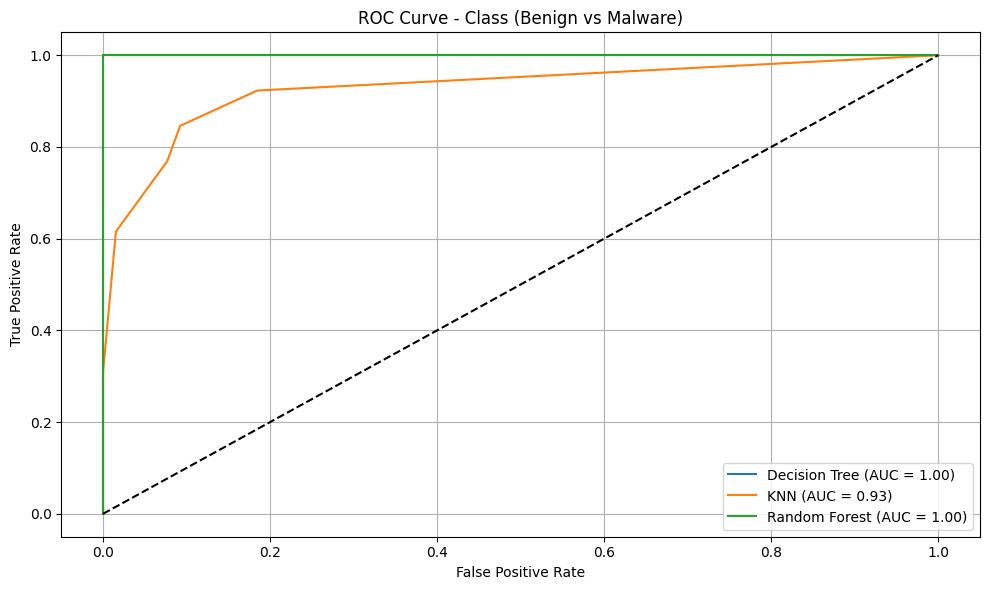

In [46]:
# 5. Train, Predict, Evaluate
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# 6. Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class (Benign vs Malware)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#ROC Curve for Binary Class Classification

In [47]:
#Multiclass Classification (4 Classes)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [49]:
# 1. Feature-label split
# X = df2.drop(columns=['Category'])
# y = df2['Category']

In [50]:
# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

In [51]:
# 3. One-hot encode for ROC-AUC (multiclass)
y_binarized = label_binarize(y_encoded, classes=range(len(class_names)))

In [52]:
# 4. Train-test split + scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
# 5. Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [58]:
# 6. Train and Evaluate
import numpy as np # Import numpy

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro', zero_division=0)) # Added zero_division
    print("Recall (macro)   :", recall_score(y_test, y_pred, average='macro', zero_division=0))    # Added zero_division
    print("F1 Score (macro) :", f1_score(y_test, y_pred, average='macro', zero_division=0))       # Added zero_division
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




 Decision Tree Metrics:
Accuracy : 1.0
Precision (macro): 1.0
Recall (macro)   : 1.0
F1 Score (macro) : 1.0
Confusion Matrix:
 [[65  0]
 [ 0 13]]

 KNN Metrics:
Accuracy : 0.8974358974358975
Precision (macro): 0.8095238095238095
Recall (macro)   : 0.8461538461538463
F1 Score (macro) : 0.8258928571428572
Confusion Matrix:
 [[60  5]
 [ 3 10]]

 Random Forest Metrics:
Accuracy : 1.0
Precision (macro): 1.0
Recall (macro)   : 1.0
F1 Score (macro) : 1.0
Confusion Matrix:
 [[65  0]
 [ 0 13]]


<Figure size 1000x600 with 0 Axes>

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np # Import numpy for unique

# --- IMPORTANT: Replace this section with your actual target variable definition for 'Family' ---
# Define your target variable (y_family) here.
# For example, if you have a column named 'FamilyLabel' in a separate DataFrame:
# family_labels_df = pd.read_csv('/content/drive/MyDrive/your_family_labels_file.csv')
# y_family = family_labels_df['FamilyLabel']
# Or if you can derive the Family label from existing data, do it here.
# Replace the lines below with your code to define y_family:

# For now, let's create a dummy target variable based on a simple condition for demonstration
# Replace this with your actual target variable definition!
# This example creates 3 "dummy families" based on ranges of 'NtWriteFile'
def assign_dummy_family(write_count):
    if write_count < 100:
        return 'Family_A'
    elif 100 <= write_count < 1000:
        return 'Family_B'
    else:
        return 'Family_C'

y_family = df3['NtWriteFile'].apply(assign_dummy_family)
# --- End of IMPORTANT section ---

# Encode labels
le_family = LabelEncoder()
y_family_encoded = le_family.fit_transform(y_family)
family_class_names = le_family.classes_

# Define your features (X_family) - use df3
X_family = df3

# Split data into training and testing sets
X_family_train, X_family_test, y_family_train_encoded, y_family_test_encoded = train_test_split(
    X_family, y_family_encoded, test_size=0.2, random_state=42, stratify=y_family_encoded
)

# Scale features
scaler_family = StandardScaler()
X_family_train_scaled = scaler_family.fit_transform(X_family_train)
X_family_test_scaled = scaler_family.transform(X_family_test)

print("Data split for Family prediction successfully:")
print("X_family_train shape:", X_family_train.shape)
print("X_family_test shape:", X_family_test.shape)
print("y_family_train_encoded shape:", y_family_train_encoded.shape)
print("y_family_test_encoded shape:", y_family_test_encoded.shape)

# Display the first few values of y_family_encoded to check
print("\nFirst 5 encoded values of y_family:")
display(y_family_encoded[:5])

# Display the first few original family values to check
print("\nFirst 5 original values of y_family:")
display(y_family.head())

Data split for Family prediction successfully:
X_family_train shape: (308, 48)
X_family_test shape: (78, 48)
y_family_train_encoded shape: (308,)
y_family_test_encoded shape: (78,)

First 5 encoded values of y_family:


array([0, 0, 0, 0, 0])


First 5 original values of y_family:


,NtWriteFile
1,Family_A
2,Family_A
3,Family_A
4,Family_A
5,Family_A
